<a href="https://colab.research.google.com/github/Junjaee/Choo_2021predict/blob/main/%EC%B6%94%EC%8B%A0%EC%88%98_2021_KBO%EC%98%88%EC%83%81%EC%84%B1%EC%A0%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# 우선 예측을 위해서는 KBO를 거쳐간 용병들의 데이터(KBO wRC+와 직전시즌 MLB wRC+)가 필요했는데, 그 중에서도 허수는 제외해야 했기에 아래와 같은 몇가지 기준을 갖고 선수들을 추려봤습니다.

# 0. 2010년부터 2020년까지의 선수들로 구성한다

# 1. AAA에만 있던 용병은 제외한다(ex. 로하스, 라모스)

# 2. KBO 오기 직전 시즌에 50타석 이상의 MLB 성적이 존재한다.
#     (ex.로맥 15 애리조나 16타석 wRC+ 127은 제외)

# 3. KBO를 거쳐 다시 MLB에 입성한 선수들의 성적도 재반영한다.(ex.테임즈, 러프)

# 4. 직전시즌 MLB에서 폭망한 선수는 해당 시즌을 기준으로 2년내에 50타석 이상의 MLB 기록을 반영한다. 그마저도 없으면 제외한다.
# (ex. 펠릭스 피에 13시즌 31타석 wRC+ 2  -> 11시즌 wRC+46 반영;  아두치 14시즌 114타석 wRC+28, 13시즌 34타석 -> 제외 )

# 5. KBO보다 MLB 성적이 더 좋은 경우 부적응으로 보고 제외한다.
#     (가코 11시즌 KBO wRC+78, 09시즌 MLB wRC+105  -> 제외)

# 6. KBO에서 100타석 이상 타석에 들어선 기록이 있다.

# 7. 나이는 고려하지 않는다.


# 위의 기준에 부합하는 선수들을 추린 결과 총 35명이 남았고, 팬그래프 사이트를 통해 해당 선수들의 wRC+를 수집했습니다.


# df = pd.read_csv("D:\Coding\KBO_baseball\Choo\Choo_.csv")
df = pd.read_csv("Choo_.csv")
print(df.head)

<bound method NDFrame.head of     MLB  KBO
0    89  139
1    82  165
2    75  131
3    83  163
4    91  148
5    95  141
6   140  149
7   100  140
8    69  148
9    88  146
10   92  134
11   83  120
12   67  127
13   85  115
14   74  127
15   81  114
16   46  117
17   84  117
18   59  124
19   48  105
20   38   95
21   88  139
22   72  110
23   26   89
24   48  102
25   69  100
26   52   95
27   84  109
28   59  103
29   87  103
30   87  138
31  108  120
32   70  134
33   26   52
34  125  165>


In [179]:
Y = df['KBO'].values
Y = Y.astype('int')

# KBO 변수 제거
X = df.drop(['KBO'], axis = 1)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

predicts = []

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)

    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    # if score >= 0:
    A = model.predict([[97]])
    predicts.append(A)

print(np.mean(predicts))

138.31683255933154


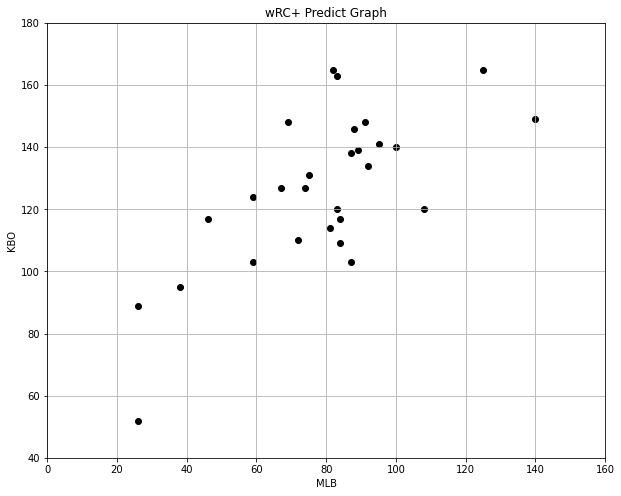

In [136]:
plt.title('wRC+ Predict Graph')
plt.xlabel('MLB')
plt.ylabel('KBO')
plt.rcParams["figure.figsize"] = (10,8)

plt.scatter(X_train, Y_train, color = 'black')
plt.axis([0,160,40,180])    #x축, y축 범위 설정
plt.grid(True)

plt.show()

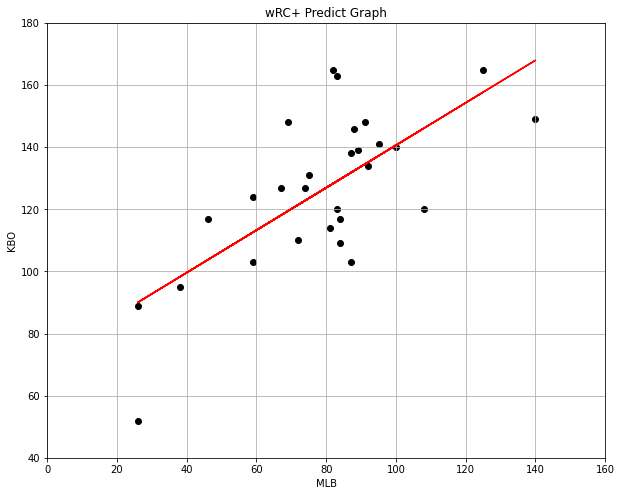

In [165]:
plt.title('wRC+ Predict Graph')
plt.xlabel('MLB')
plt.ylabel('KBO')
plt.rcParams["figure.figsize"] = (10,8)

plt.scatter(X_train, Y_train, color = 'black')
plt.axis([0,160,40,180])    #x축, y축 범위 설정
plt.grid(True)

plt.plot(X_train, model.predict(X_train), color = 'r')
plt.show()

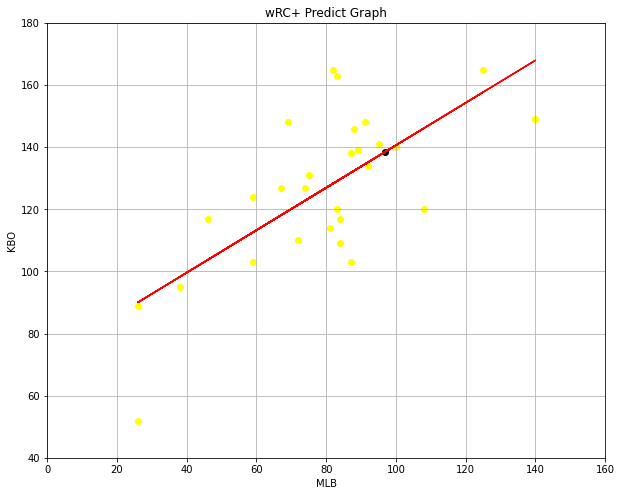

In [178]:
plt.title('wRC+ Predict Graph')
plt.xlabel('MLB')
plt.ylabel('KBO')

plt.scatter(X_train, Y_train, color = 'yellow')
plt.axis([0,160,40,180])
plt.grid(True)

plt.plot(X_train, model.predict(X_train), color = 'r')
plt.scatter([[97]], [138.31], color = 'black')
plt.show()